In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
call_data = "../data/raw/call-center-data-v2-daily.csv"
df = pd.read_csv(call_data, parse_dates=["Date"])

In [3]:
df.set_index("Date", inplace=True)

In [4]:
time_cols = ["Answer Speed (AVG)", "Talk Duration (AVG)", "Waiting Time (AVG)"]
for col in time_cols:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

In [5]:
df.describe()

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,202.635926,176.935846,25.700080,24.931034,157.603047,232.364074
std,166.241066,115.697913,71.706083,23.744697,23.716533,190.810148
min,5.000000,5.000000,0.000000,2.000000,57.000000,3.000000
25%,124.000000,114.000000,3.000000,13.000000,142.000000,118.000000
50%,179.000000,165.000000,9.000000,21.000000,157.000000,182.000000
75%,236.000000,215.000000,19.000000,30.000000,171.000000,276.000000
max,1715.000000,909.000000,844.000000,308.000000,288.000000,1551.000000


In [6]:
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()

Data Head:
            Incoming Calls  Answered Calls  Abandoned Calls  \
Date                                                          
2022-01-01             157             145               12   
2022-01-02              37              37                0   
2022-01-03             317             304               13   
2022-01-04             253             244                9   
2022-01-05             214             205                9   

            Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  
Date                                                                     
2022-01-01                15.0                149.0               192.0  
2022-01-02                 3.0                126.0                35.0  
2022-01-03                18.0                 95.0               157.0  
2022-01-04                13.0                110.0               122.0  
2022-01-05                10.0                130.0               202.0  

Data Info:
<class 'pandas.co

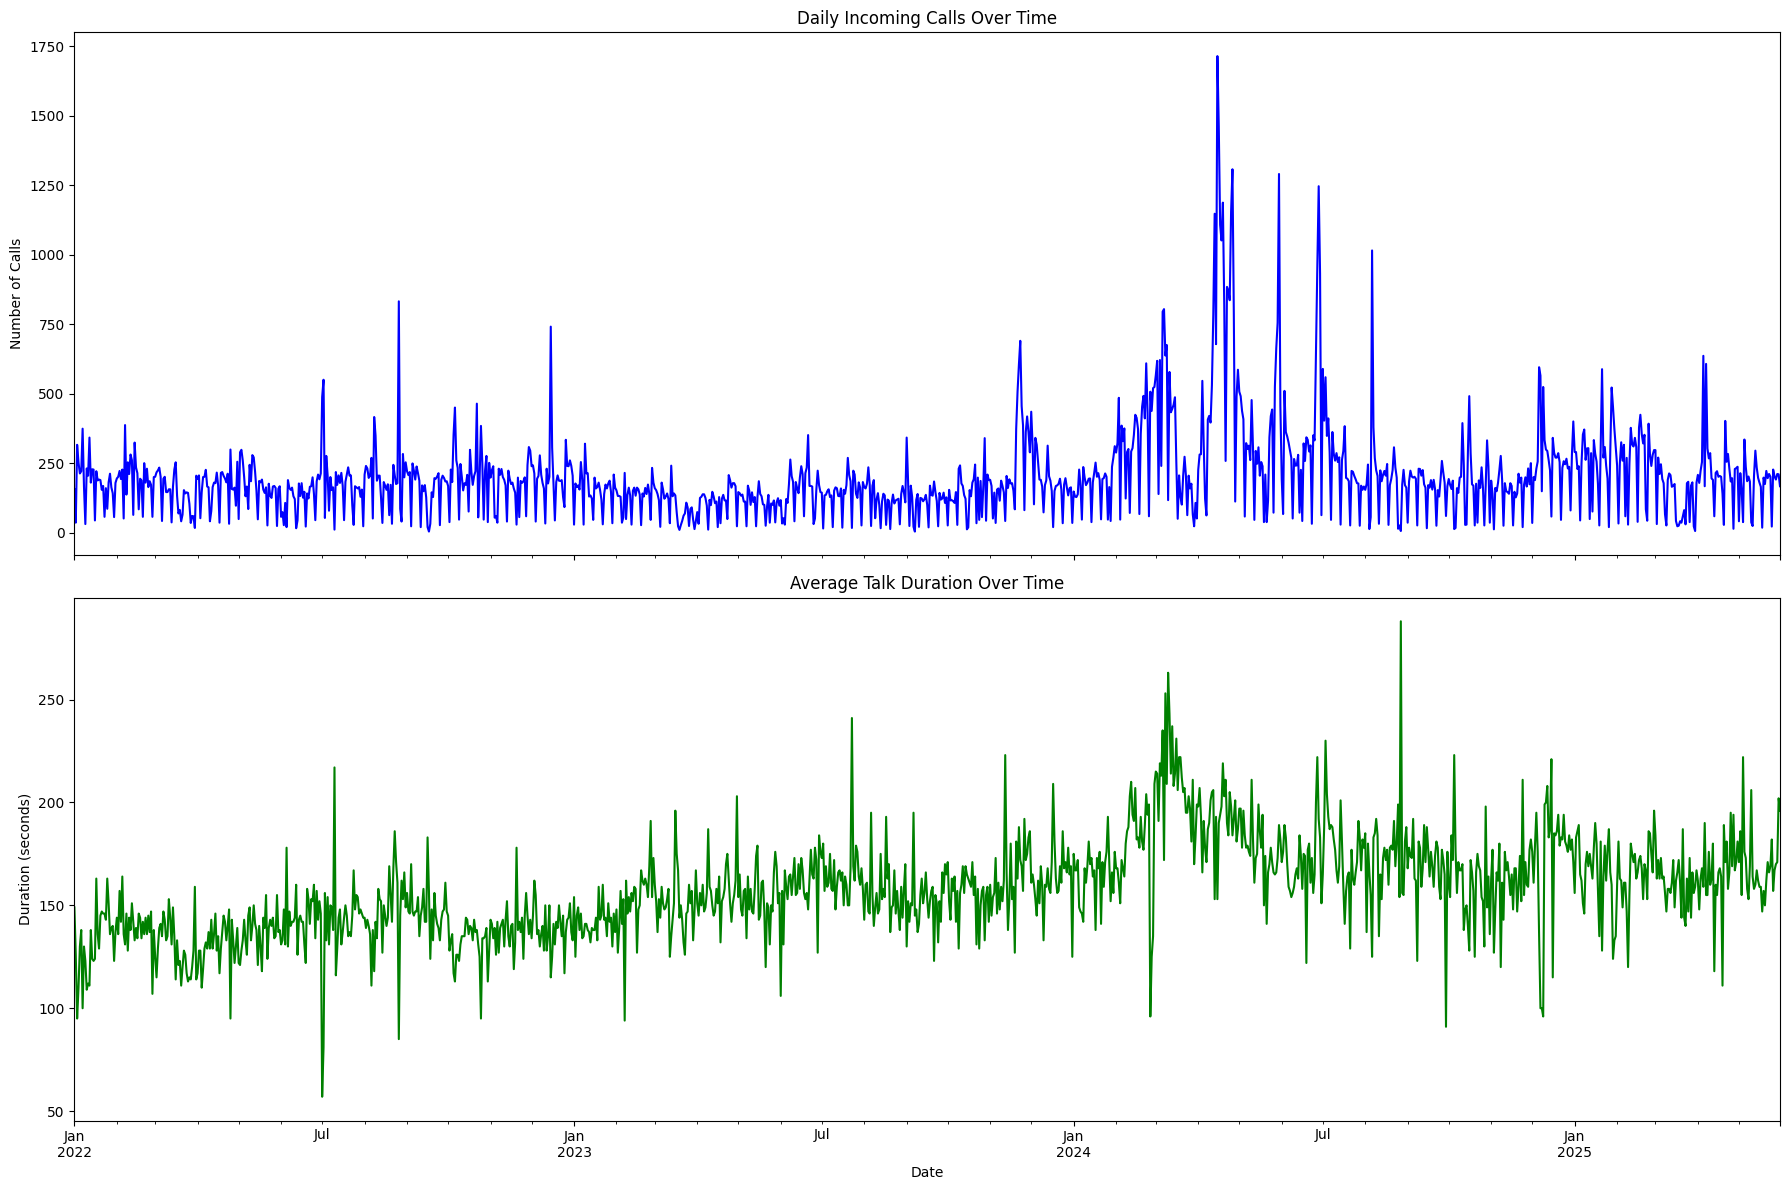

In [7]:
# Create plots to visualize the two target variables over time
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# Plot Incoming Calls
df["Incoming Calls"].plot(
    ax=axes[0], title="Daily Incoming Calls Over Time", color="blue"
)
axes[0].set_ylabel("Number of Calls")

# Plot Average Talk Duration
df["Talk Duration (AVG)"].plot(
    ax=axes[1], title="Average Talk Duration Over Time", color="green"
)
axes[1].set_ylabel("Duration (seconds)")

plt.xlabel("Date")
plt.tight_layout()
plt.show()